In [2769]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier

In [2770]:
df = pd.read_csv('./data/wineQT.csv')

In [2771]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [2772]:
df.shape

(1143, 13)

In [2773]:
kvalitet = df['quality'].unique()
print(f"Quality har ett värde mellan {kvalitet.min()} - {kvalitet.max()} som indikerar hur bra dom är")

Quality har ett värde mellan 3 - 8 som indikerar hur bra dom är


fixed acidity


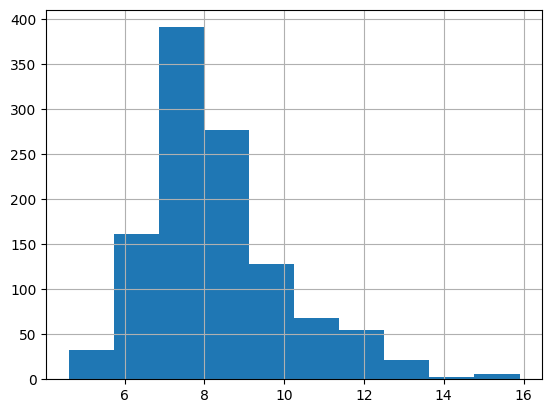

volatile acidity


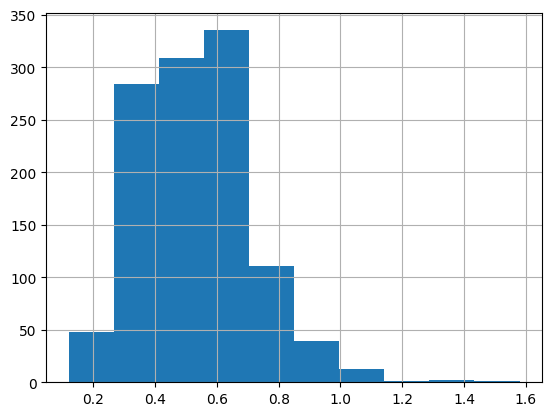

citric acid


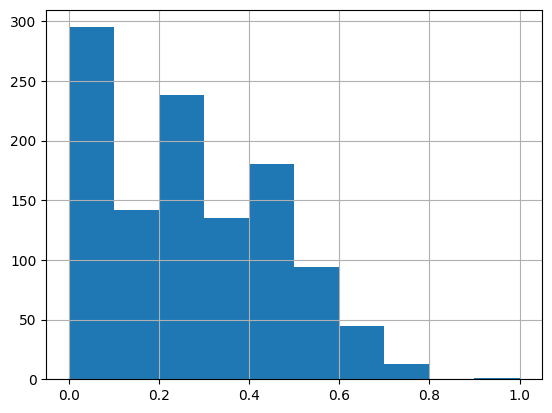

residual sugar


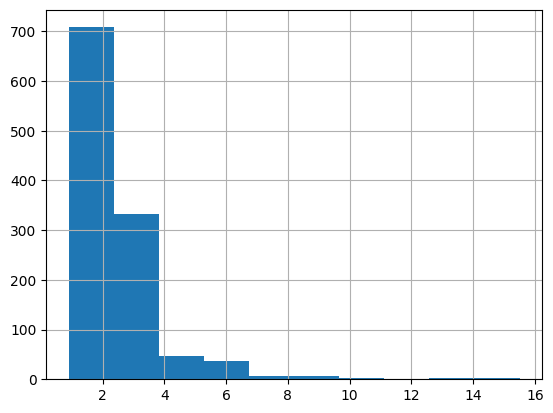

chlorides


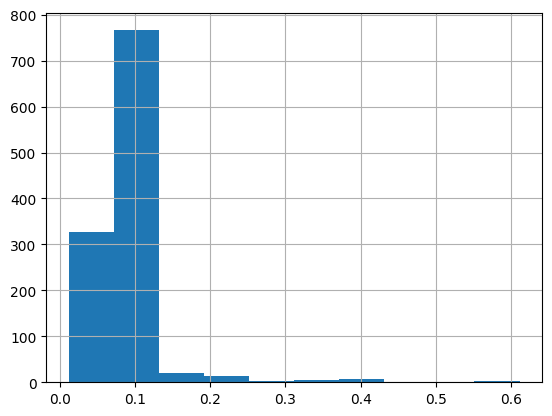

free sulfur dioxide


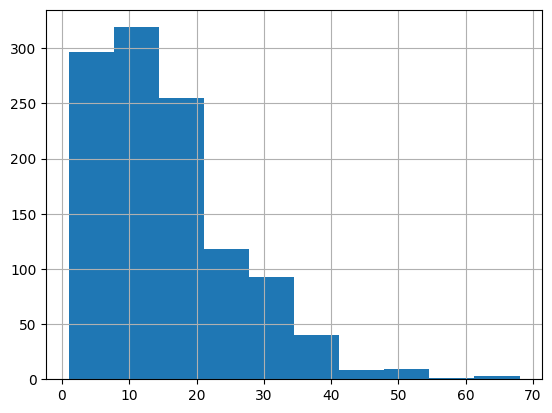

total sulfur dioxide


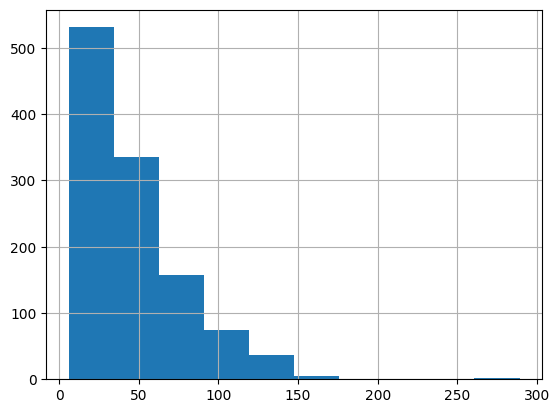

density


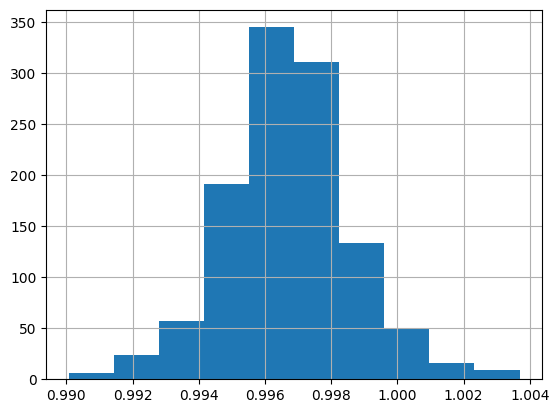

pH


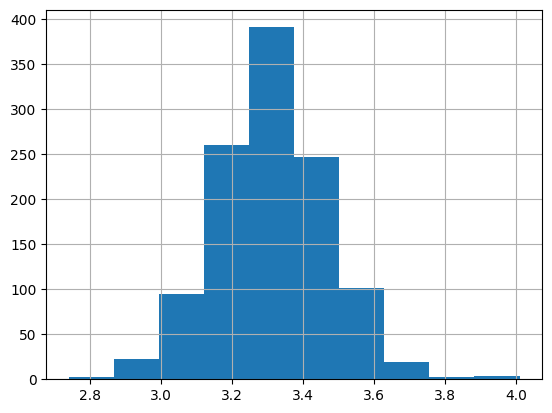

sulphates


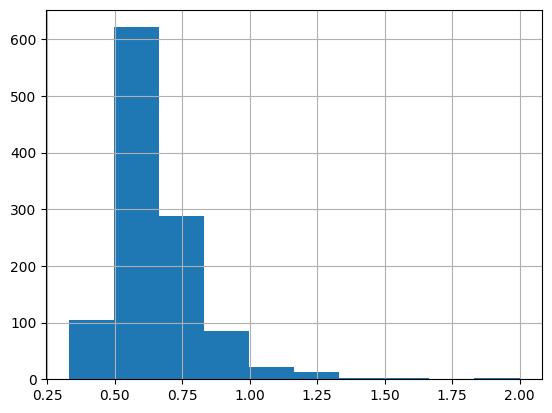

alcohol


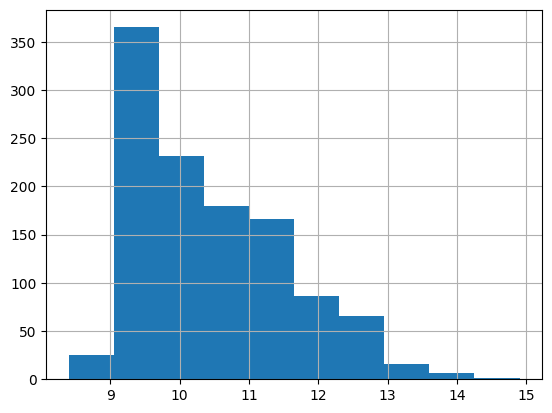

quality


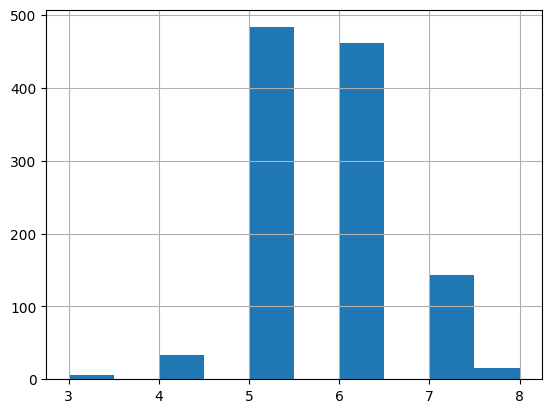

Id


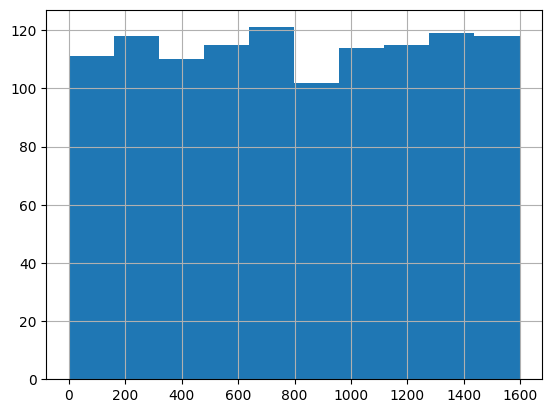

In [2774]:
for columns in df:
    df[columns].hist()
    print(columns)
    plt.show()

## Det finns attributet id som inte behöver vara med när vi ska analysera datan

In [2775]:
x = df.drop(columns=['quality','Id'])
y = df['quality']

In [2776]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

### Jag kommer att träna två olika modeller för att jämföra deras score, detta kommer att gås igenom mer under VG delen av uppgiften. Men jag kommer framförallt fokusera på DecisionTreeClassifier och därför kommer själva analysen på G nivå enbart handla om den.

In [2777]:
clf = tree.DecisionTreeClassifier(random_state=42)
clf = clf.fit(x_train, y_train)

In [2778]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [2779]:
model.score(x_test,y_test)

0.6530612244897959

In [2780]:
clf.score(x_test,y_test)

0.5860058309037901

In [2781]:
print(f'Djupet på trädet är: {clf.get_depth()}')

print(f'Antalet löv: {clf.get_n_leaves()}')

Djupet på trädet är: 14
Antalet löv: 214


In [2782]:
importance = clf.feature_importances_

feature_importance = dict(zip(x.columns, importance))

sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

print("Attributvikt:")
for feature, importance in sorted_feature_importance:
    print(feature, ":", importance)

Attributvikt:
sulphates : 0.15349052377864222
alcohol : 0.1486282663876216
volatile acidity : 0.1190812981991359
total sulfur dioxide : 0.11068951075584237
pH : 0.09478964461326206
citric acid : 0.08843110139401437
chlorides : 0.06862370755086229
density : 0.06091088142744968
residual sugar : 0.058009981629616854
fixed acidity : 0.04897225687482843
free sulfur dioxide : 0.048372827388724206


# VG

In [2783]:
print(f"Vi får träningsscore: {clf.score(x_train,y_train)}")
print(f"Vi får testscore: {clf.score(x_test,y_test)}")

Vi får träningsscore: 1.0
Vi får testscore: 0.5860058309037901


### Som vi ser ovan så får vi en perfekt träningsscore vilket måste betyda att trädet katigoriserar in allting perfekt i förhållande till träningsdatan.
### Dock så även fast ca 60% är helt okej testscore så känns det inte allt för pålitligt. Detta kan bero på överträning och har gjort beslutsträdet för komplicerat och anpassar sig till träningsdatan och gör att den inte kan lika enkelt sortera ny data.
### Vi kan pröva att experimentera med parameterna för algoritmen t.ex. max djup, men även mängden träningsdata vi skickar in. Det kan även vara så att vi kan droppa onödiga attribut som inte har så mycket påverkan.
### Ytterliggare en sak man kan tillägga är att man även kan testa en annan modell, jag har jobbat med DecisionTreeClassifier, men nedan kommer jag testa RandomForestClassifier och se vad jag får för score med den.

In [2784]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=30, random_state=42)

In [2785]:
clf = tree.DecisionTreeClassifier(max_depth=8, random_state=42)
clf = clf.fit(x_train, y_train)

In [2786]:
print(f"Vi får träningsscore: {clf.score(x_train,y_train)}")
print(f"Vi får testscore: {clf.score(x_test,y_test)}")

Vi får träningsscore: 0.8023360287511231
Vi får testscore: 0.6666666666666666


In [2787]:
# plt.figure(figsize=(16,16))  # set plot size (denoted in inches)
# tree.plot_tree(clf,feature_names=clf.feature_names_in_ ,fontsize=5)
# plt.show()

In [2788]:
clf.tree_.max_n_classes

6

In [2789]:
# r = export_text(clf)
# print(r)

In [2790]:
model = RandomForestClassifier(random_state=42, max_depth=8)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [2791]:
model.score(x_test,y_test)

0.7333333333333333

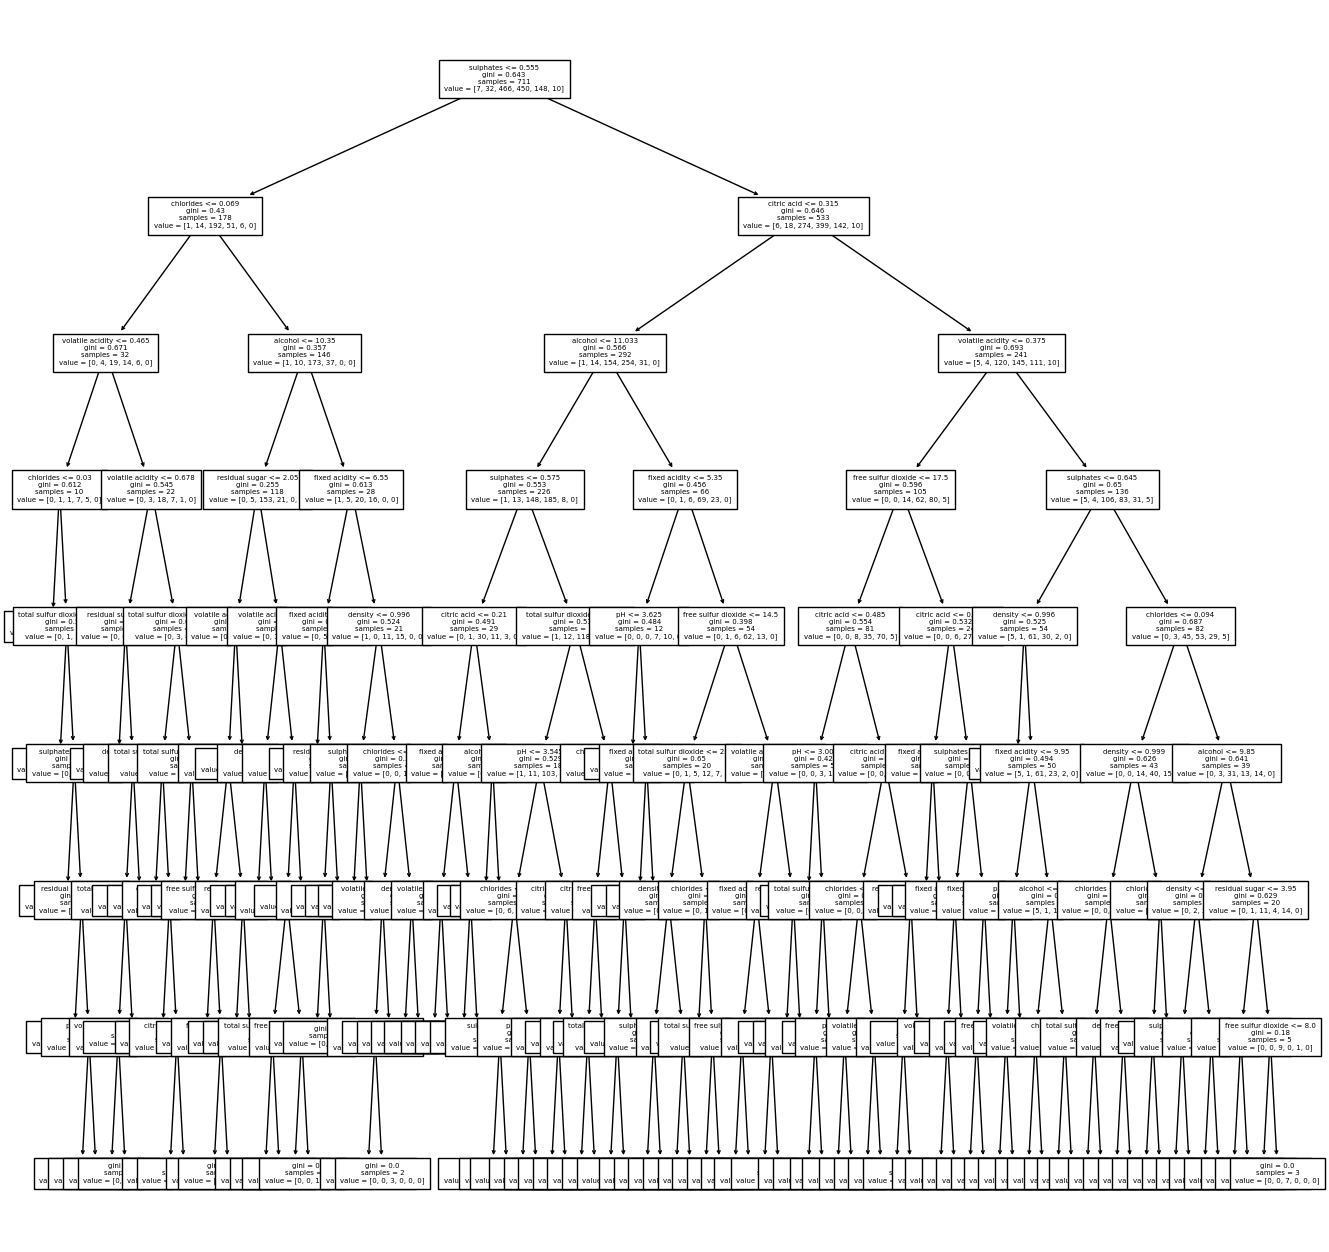

In [2792]:
plt.figure(figsize=(16,16))
tree.plot_tree(model.estimators_[0],feature_names=clf.feature_names_in_ ,fontsize=5)
plt.show()